In [9]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### Exercise 2

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

In [10]:
if not os.path.exists('32158__zin__piano-2-140bpm.wav'):
    !wget https://github.com/dmrnz/ThinkDSP/blob/master/code/32158__zin__piano-2-140bpm.wav

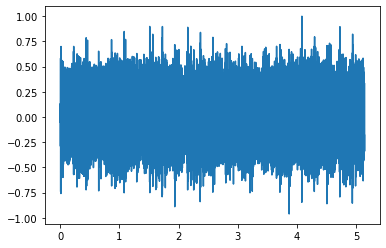

In [11]:
from thinkdsp import read_wave

wave = read_wave('32158__zin__piano-2-140bpm.wav')
wave.normalize()
wave.make_audio()
wave.plot()

In [12]:
segment = wave.segment(start=0, duration=0.22)
segment.make_audio()

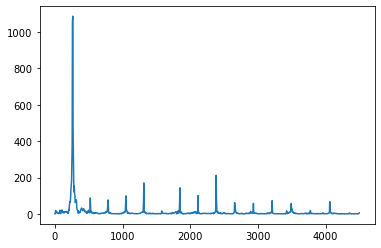

In [24]:
spectrum = segment.make_spectrum()
spectrum.plot(high=4500)

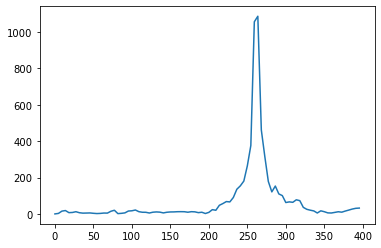

In [23]:
spectrum = segment.make_spectrum()
spectrum.plot(high=400)

In [14]:
spectrum.peaks()[:30]

[(1086.9168040549735, 263.6363636363637),
 (1056.4799731285555, 259.0909090909091),
 (461.6602189435344, 268.1818181818182),
 (376.41743476417395, 254.54545454545456),
 (315.4413925485555, 272.72727272727275),
 (264.52526646073824, 250.00000000000003),
 (212.45719400174772, 2381.818181818182),
 (180.89137200113655, 245.45454545454547),
 (178.78861553389234, 277.2727272727273),
 (170.29581831541785, 1313.6363636363637),
 (154.56952024368042, 240.90909090909093),
 (153.4129926387183, 286.3636363636364),
 (143.43580836378854, 1845.4545454545457),
 (135.85358815015928, 236.36363636363637),
 (121.47573165822347, 281.81818181818187),
 (110.2565376367695, 290.90909090909093),
 (100.9712669277051, 295.4545454545455),
 (100.494832882711, 2113.636363636364),
 (99.21007566264315, 1050.0),
 (90.5700729393546, 231.81818181818184),
 (87.68835461647764, 522.7272727272727),
 (79.391434701986, 2386.3636363636365),
 (77.9065710133682, 313.6363636363637),
 (76.96056002401745, 786.3636363636365),
 (73.212

In [15]:
spectrum.low_pass(2000)

In [16]:
spectrum.make_wave().make_audio()

In [17]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.

    Plots the spectrum and displays an Audio widget.

    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')

    audio = spectrum.make_wave().make_audio()
    display(audio)

In [18]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave),
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### Exercise 2

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

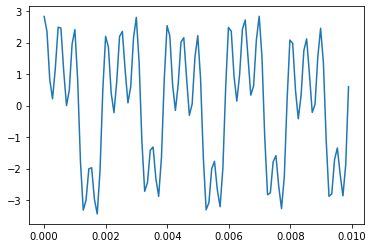

In [25]:
from thinkdsp import SinSignal, CosSignal

signal = (CosSignal(freq=1000, amp=1.0) +
              SinSignal(freq=600, amp=2.0) +
              CosSignal(freq=400, amp=0.33) +
              CosSignal(freq=2000, amp=1.5))
signal.plot()

In [30]:
wave2 = signal.make_wave(duration=3)
wave2.apodize()

In [31]:
wave2.make_audio()

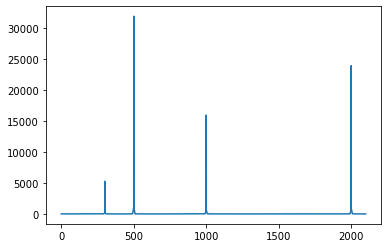

In [37]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2100)

If we add a component that is not a multiple of 200 Hz, we hear it as a distinct pitch.

In [38]:
signal += SinSignal(freq=333)
signal.make_wave().make_audio()

### Exercise 3

Write a function called `stretch` that takes a Wave
 and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.
  Hint: it should only take two lines of code.

In [45]:
wave3 = read_wave('32158__zin__piano-2-140bpm.wav')
wave3.normalize()
wave3.make_audio()

In [46]:
def stretch(wave, stretch_factor):
    wave.ts /= stretch_factor
    wave.framerate *= stretch_factor

In [47]:
stretch(wave3, 2)
wave3.make_audio()

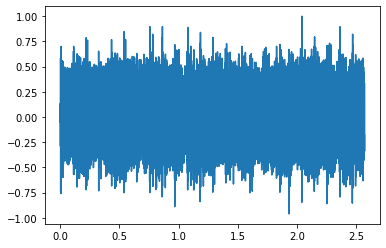

In [48]:
wave3.plot()